Dataset loaded successfully.

Generated all plots successfully!


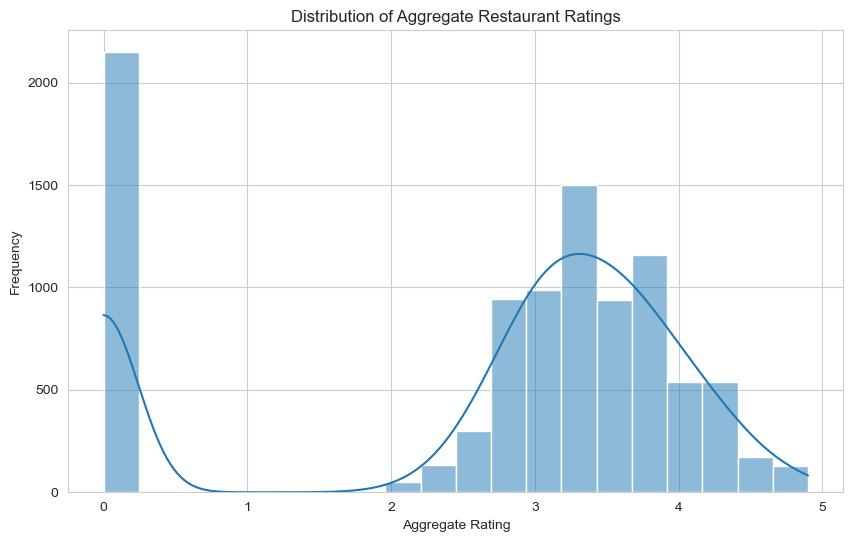

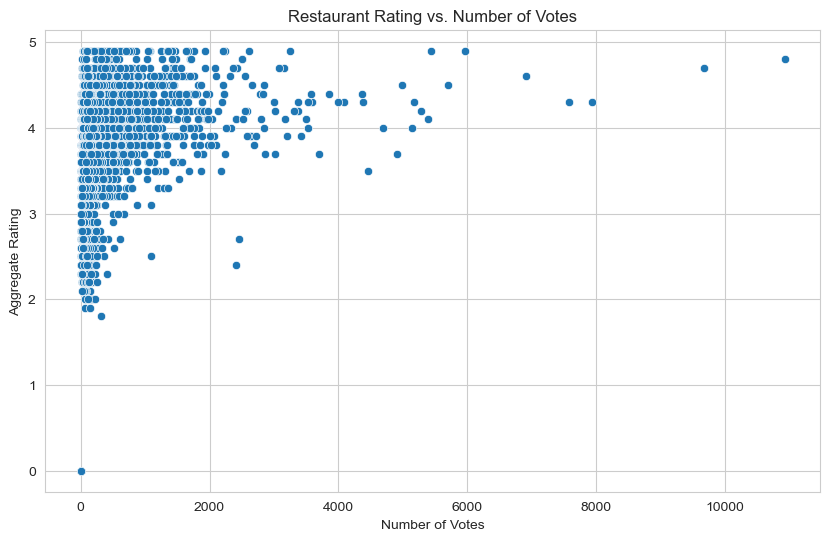

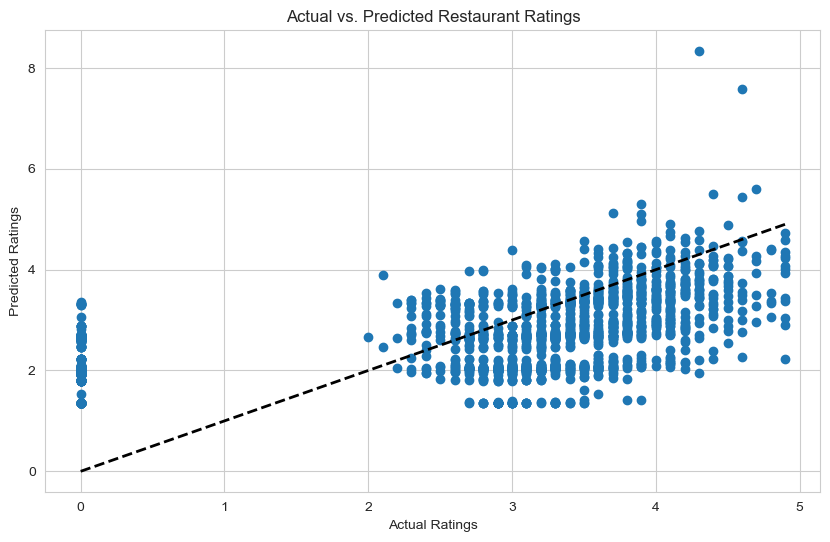

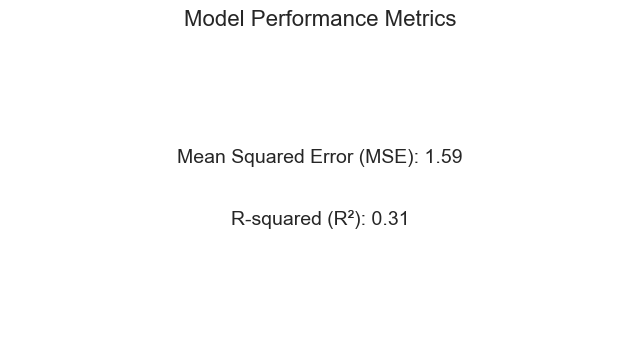

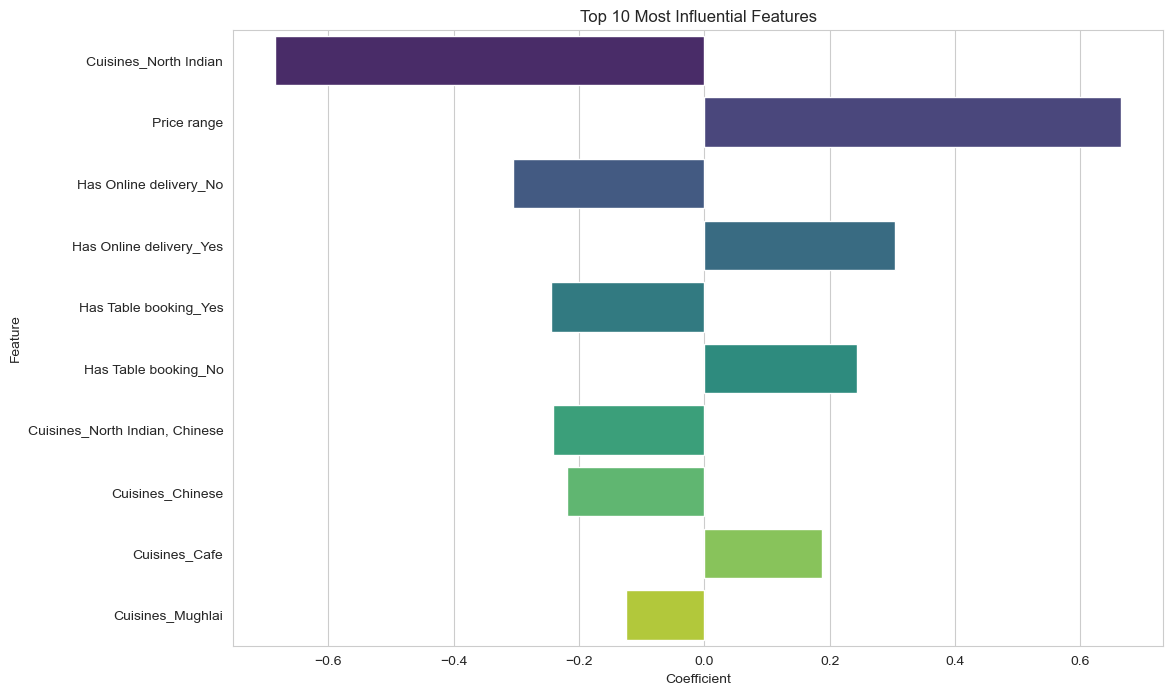

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Hide Future Warnings ---
# Add these lines to ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 1. Load and Preprocess the Data ---

try:
    df = pd.read_csv('Dataset .csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Dataset .csv' not found. Using a sample dataset for demonstration.")
    data = {'Has Table booking': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
            'Has Online delivery': ['Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No'],
            'Price range': [3, 2, 4, 1, 3, 2, 4],
            'Votes': [100, 50, 200, 80, 150, 90, 250],
            'Average Cost for two': [500, 300, 1000, 200, 700, 400, 1200],
            'Cuisines': ['North Indian, Mughlai', 'Italian', 'Chinese', 'South Indian', 'Continental', 'Mexican', 'Thai'],
            'Aggregate rating': [4.5, 3.8, 4.2, 3.5, 4.0, 3.9, 4.8]}
    df = pd.DataFrame(data)

df.dropna(subset=['Cuisines'], inplace=True)

# --- 2. Feature Selection and Model Training ---

features = ['Has Table booking', 'Has Online delivery', 'Price range', 'Votes', 'Average Cost for two', 'Cuisines']
categorical_features = ['Has Table booking', 'Has Online delivery', 'Cuisines']
numerical_features = ['Price range', 'Votes', 'Average Cost for two']
target = 'Aggregate rating'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

# --- 3. All Visualizations ---

sns.set_style('whitegrid')

# Plot 1: Distribution of Aggregate Rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.savefig("rating_distribution.png")

# Plot 2: Votes vs. Aggregate Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Restaurant Rating vs. Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.savefig("votes_vs_rating.png")

# Plot 3: Actual vs. Predicted Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Restaurant Ratings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.savefig("actual_vs_predicted.png")


# Plot 4: Model Performance Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 4))
plt.text(0.5, 0.6, f'Mean Squared Error (MSE): {mse:.2f}', ha='center', va='center', size=14)
plt.text(0.5, 0.4, f'R-squared (R²): {r2:.2f}', ha='center', va='center', size=14)
plt.title('Model Performance Metrics', size=16)
plt.axis('off')
plt.savefig("performance_metrics.png")

# Plot 5: Most Influential Features
ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

coefficients = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': model_pipeline.named_steps['regressor'].coef_
})

top_10_features = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Most Influential Features')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.savefig("influential_features.png")

print("\nGenerated all plots successfully!")
plt.show() # This can be uncommented if you are running in a local environment and want to see plots pop up.